In [221]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [222]:
#Create a function for each defects where each function receive an bottle image with one or more defects. The image will be a numpy array.
"""
Defect list: 
CONTENT_HIGH ok,
CONTENT_LOW ok,

COVER_NONE (tampa) to be implemented,
BOTTLE_SMASHED,
LABEL_WHITE ok,
LABEL_MISPLACED,
LABEL_NONE ok,
BOTTLE_NONE .
"""

'\nDefect list: \nCONTENT_HIGH ok,\nCONTENT_LOW ok,\nCOVER_NONE ,\nBOTTLE_SMASHED,\nLABEL_WHITE ok,\nLABEL_MISPLACED,\nLABEL_NONE ok,\nBOTTLE_NONE ok.\n'

In [223]:
def content_high():
    return

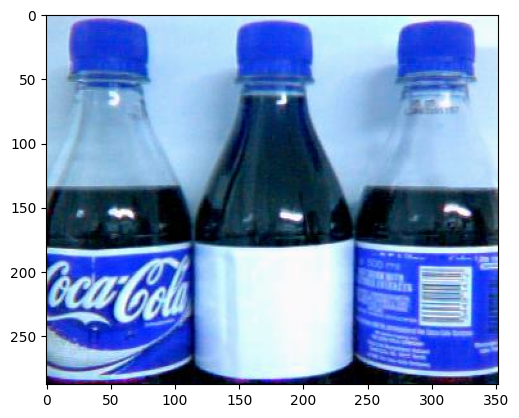

In [224]:
img = cv2.imread("train/train_67.jpg")

plt.imshow(img, cmap='gray')

In [263]:
def split_image(img):

    image = img
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    height, width = image.shape

    # Calculate the split points for both width and height
    split_point1_width = width // 3
    split_point2_width = 2 * width // 3
    split_point1_height = height // 2

    y_start = 60

    # Split the image into three parts
    part1 = image[y_start:split_point1_height, :split_point1_width]
    part2 = image[y_start:split_point1_height, split_point1_width:split_point2_width]
    part3 = image[y_start:split_point1_height, split_point2_width:]

    # Plot the parts using matplotlib
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(part1, cv2.COLOR_BGR2RGB))
    plt.title('Part 1')
 
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(part2, cv2.COLOR_BGR2RGB))
    plt.title('Part 2')
 
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(part3, cv2.COLOR_BGR2RGB))
    plt.title('Part 3')
     
    plt.show()

    return part1, part2, part3


In [264]:
def segmentation(img):
    _, image = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
    return image

In [265]:
def compare_threshold(img, row_start, row_end, col_start, col_end, target, is_high):
    roi = img[row_start:row_end, col_start:col_end]
    mean = np.mean(roi)
    #print("Mean value based on threshold: ",mean)

    if is_high:
        if mean < target:
            return 1
        return 0
    else:
        if mean > target:
            return 1
        return 0

In [266]:
def check_high_content(img):
    res = []
    imgs = split_image(img)

    for img_piece in imgs:
        segmented_img = segmentation(img_piece)
        res.append(segmented_img)

    return compare_threshold(res[1], 60,75, 40,60, target=60, is_high=True)


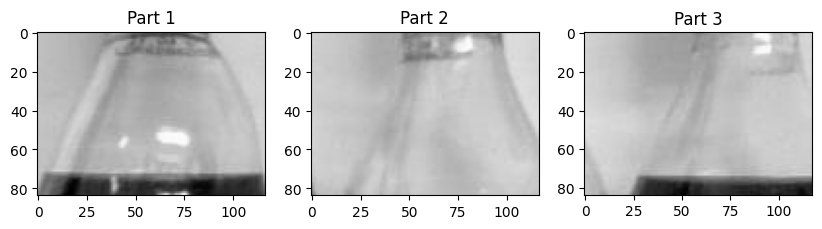

0


In [267]:
for i  in range(1):
    
    IMG_PATH = (f"train/train_22.jpg")
    img = cv2.imread(IMG_PATH)
    print(check_high_content(img))


In [268]:
def check_low_content(img):
    imgs = split_image(img)
 
    segmented_img = segmentation(imgs[1])

    return compare_threshold(segmented_img, 80,84, 75,80, target=240, is_high=False)

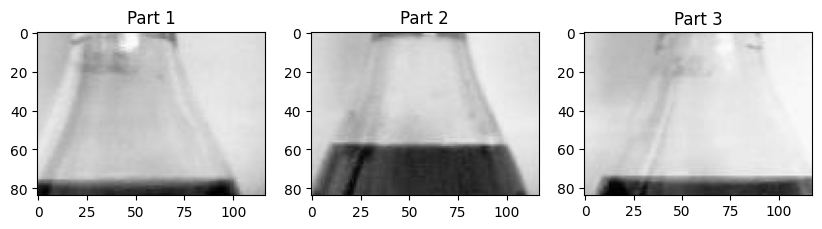

0


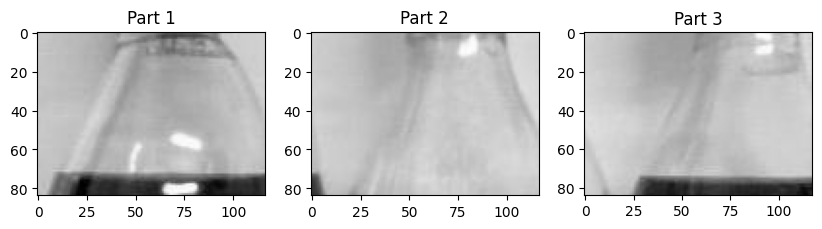

1


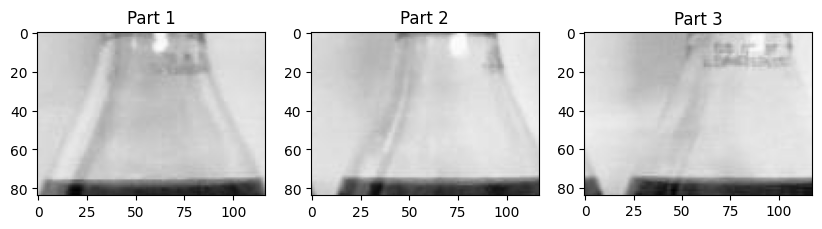

0


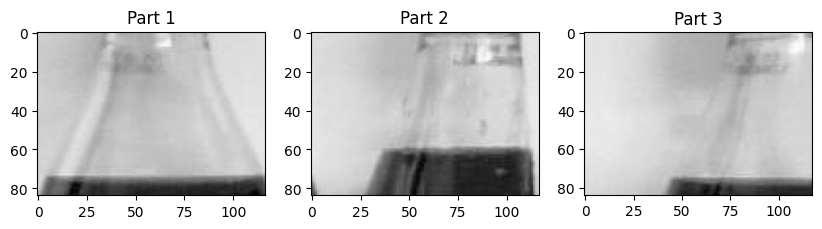

0


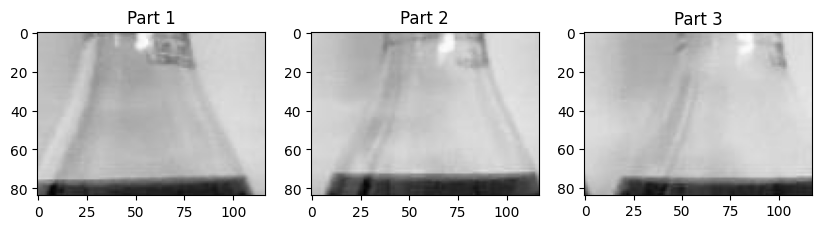

0


In [269]:

for i in range (5): 

    img2 = cv2.imread(f'images/{i+1}.jpg')
    print(check_low_content(img2))